In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
kc_data_full = pd.read_csv('kc_house_data.csv')
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].replace("?",0)
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].astype(float)
kc_data_full['zipcode'] = kc_data_full['zipcode'].astype(str)

kc_data_full = kc_data_full[~np.isnan(kc_data_full['waterfront'])]
kc_data_full = kc_data_full[~np.isnan(kc_data_full['view'])]

kc_data_full = kc_data_full.drop(['id','yr_renovated','lat','long'], axis=1)

In [3]:
df = kc_data_full[:9000]
df = df.loc[df['yr_built'] > 1975]

sqft_living = df['sqft_living']
price = df['price']
log_sqft_living = np.log(df['sqft_living'])
log_price = np.log(df['price'])
log_bedrooms = np.log(df['bedrooms'])

Text(0.5, 0, 'Price')

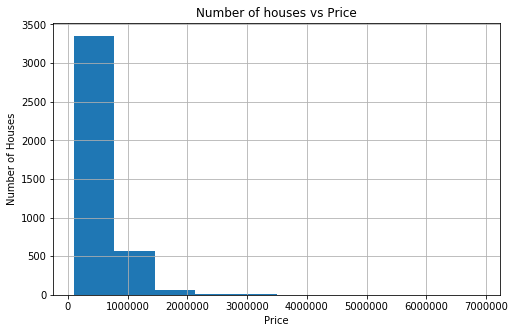

In [4]:
_=df.hist('price',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

Text(0.5, 0, 'log(Price)')

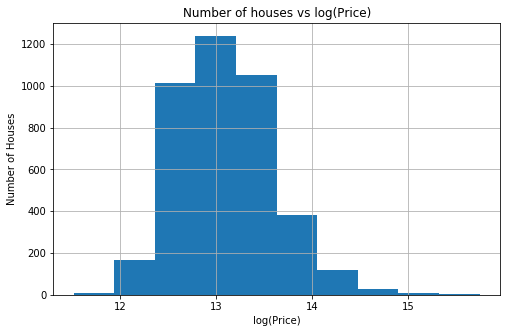

In [6]:
df['log_price'] = np.log(df['price'])

_=df.hist('log_price',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

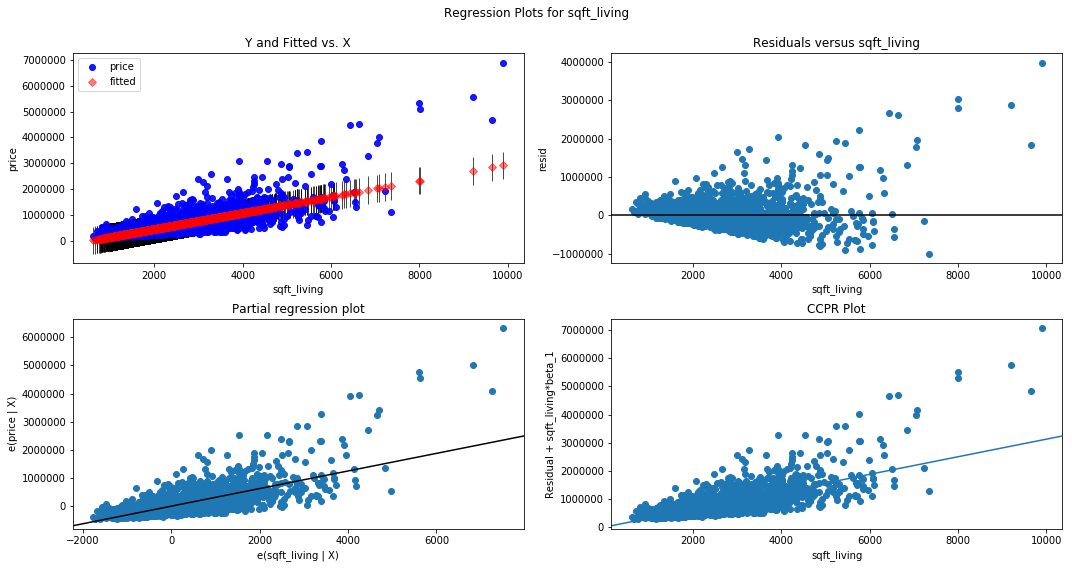

In [16]:
f = 'price~sqft_living'
model = ols(formula=f, data=df).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)

plt.savefig('sqft.png')

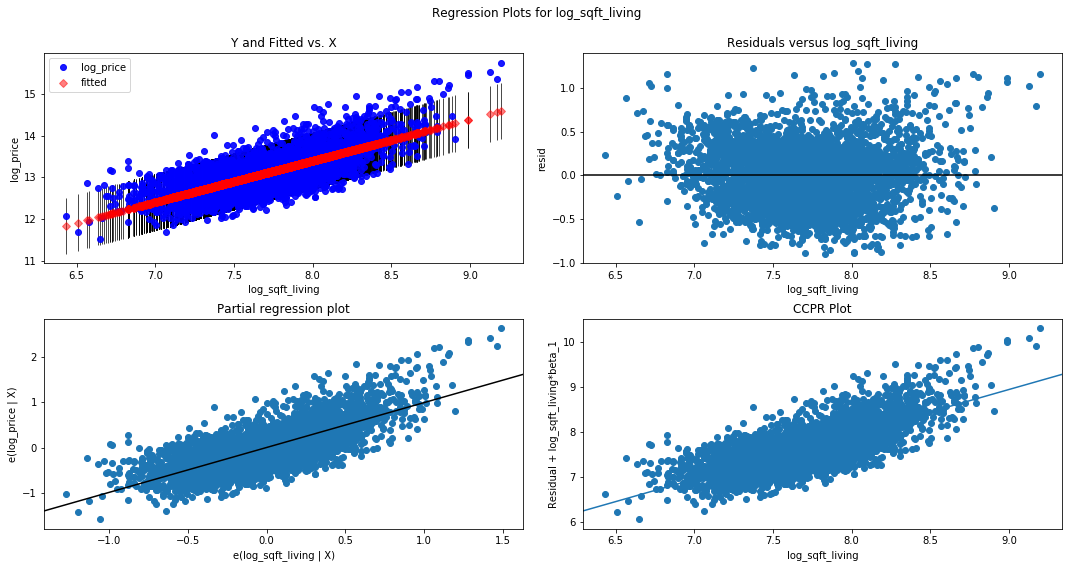

In [17]:
# df['log_sqft_living'] = np.log(df['sqft_living'])
# df['log_price'] = np.log(df['price'])

f = 'log_price~log_sqft_living'
model_log = ols(formula=f, data=df).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model_log,'log_sqft_living', fig=fig)

plt.savefig('sqft_log.png')

In [9]:
f = 'price~sqft_living'

model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4771.
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        23:11:03   Log-Likelihood:                -55970.
No. Observations:                4019   AIC:                         1.119e+05
Df Residuals:                    4017   BIC:                         1.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.783e+05   1.16e+04    -15.370      

In [12]:
f = 'log_price~sqft_living'

model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5169.
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        23:12:14   Log-Likelihood:                -1293.9
No. Observations:                4019   AIC:                             2592.
Df Residuals:                    4017   BIC:                             2604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.1449      0.014    847.454      

In [13]:
# Approx. every 10% increase in bedroom size will result in an increase of $13,791 in house value.

312 * np.log(1.1)

29.73677609894938

In [14]:
312 * np.log(2) # Approx. every 1 bedroom added will increase house value by $100,298.

216.26192033470292

In [ ]:
np.exp(.993)